# Imports

In [2]:
import numpy as np
import pandas as pd
import os

#from scipy.optimize import curve_fit
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')

import itertools as it

%config InteractiveShell.ast_node_interactivity='last'
%config InlineBackend.figure_format = 'svg'

# Data

$$f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x - a}$$

f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x - a}

        
        Absorbance is additive and depends on the concentration of the substrates

$$A_\lambda = \mathit{k_1}C_1 + \mathit{k_2}C_2 + ... + \mathit{k_n}C_n$$
        
        We measure the signals at two wavelengths, [C] is Chlamydomonas concentration
        
$$A_{680} = \mathit{k_C}[C] + \mathit{k_B}[B]$$
$$A_{750} = \mathit{k'_C}[C] + \mathit{k'_B}[B]$$

        If we're interested in bacterial growth we solve for C and equate them to one another

$$[C] = \frac{A_{680}-\mathit{k_B}[B]}{\mathit{k_C}} $$
$$[C] = \frac{A_{750}-\mathit{k'_B}[B]}{\mathit{k'_C}} $$
$$ \frac{A_{680}-\mathit{k_B}[B]}{\mathit{k_C}} = \frac{A_{750}-\mathit{k'_B}[B]}{\mathit{k'_C}} $$

        After equating them we solve for [B]. From the data collected we already know the 
        constants which allows us to make predictions about the [B] is ([B]-hat) can be,
        we can then use that to test the validity of our models



$$ \hat{[B]} = \frac{\mathit{k'_C}A_{680}-\mathit{k_C}A_{750}}{\mathit{k_B}\mathit{k'_C}- \mathit{k'_B}\mathit{k_C}} $$

$$ \hat{[C]} = \frac{\mathit{k'_B}A_{680}-\mathit{k_B}A_{750}}{\mathit{k'_B}\mathit{k_C}- \mathit{k_B}\mathit{k'_C}} $$


through these two measurements we can derive the growth of bacteria... and
through the multiple linear regression we can derive the growth of [C] and [B]
if the models are any good then these values should correspond fairly well



In [4]:
fitted = '/home/rdmtinez/Documents/B-IT MS Program/Masters Thesis/data/regression/regression_fitted_parameters.csv' 
tecan_main = '/home/rdmtinez/Documents/B-IT MS Program/Masters Thesis/data/abs-flu/exp1/tecan_results/abs-fluo_exp1_main.csv'

df_fitted = pd.read_csv(fitted, index_col=0)
df_fitted.head()

mdf = pd.read_csv(tecan_main, index_col=0)
#col_legend = df_tecan.apply(lambda df: str(df.col)+'*', axis=1).unique()

FileNotFoundError: [Errno 2] File b'/home/rdmtinez/Documents/B-IT MS Program/Masters Thesis/data/regression/regression_fitted_parameters.csv' does not exist: b'/home/rdmtinez/Documents/B-IT MS Program/Masters Thesis/data/regression/regression_fitted_parameters.csv'

In [25]:
df_fitted
mdf.head()

,row,col,well,chlamy_cnt,ln(chlamy_cnt),bact_cnt,ln(bact_cnt),corr_abs_600,corr_abs_680,corr_abs_750,corr_fluo,ln(corr_fluo)
0,A,1,A1,0.25,-1.386294,0.200,-1.609438,0.5370,0.7210,0.4146,4666.0,8.448057
1,B,1,B1,0.25,-1.386294,0.175,-1.742969,0.5559,0.7822,0.4155,4832.0,8.483016
2,C,1,C1,0.25,-1.386294,0.150,-1.897120,0.5014,0.6925,0.3829,4638.0,8.442039
3,D,1,D1,0.25,-1.386294,0.125,-2.079442,0.4693,0.6981,0.3593,4775.0,8.471149
4,E,1,E1,0.25,-1.386294,0.100,-2.302585,0.4531,0.6788,0.3414,4936.0,8.504311


# Pre-processing


Derived from simple linear regression models

    # k_C == A680_B[7]
    # k_B == A680_C[11]
    # kp_C == A750_B[7]
    # kp_B == A750_C[11]



    # A680_pred = k_C*[chlamy] + k_B*[bacter]
    # A750_pred = kp_C*[chlamy] + kp_B*[bacter]


    #[bacter]_pred = A680_T * kp_C - A750_T * k_C    /     k_B * kp_C - kp_B * k_C
    #[chlamy]_pred = A680_T * kp_B - A750_T * k_B    /     kp_B * k_C - k_B * kp_C
    
    


In [26]:
kC68 = df_fitted['k_6C'][0]
kB68 = df_fitted['k_6B'][0]

kC75 = df_fitted['k_7C'][0]
kB75 = df_fitted['k_7B'][0]

In [34]:
df_fitted

,k_6C,k_6B,k_7C,k_7B,F680_B
0,2.519103,1.237138,1.111135,1.141418,586.359911
1,-0.009530,-0.008192,-0.009239,-0.009334,497.401393


In [29]:
#predicted values from simple lineaer regression models

#df_main['abs_680_prd'] = k_6C*df_main['chlamy_cnt'] + k_B*df_main['bact_cnt']
#df_main['abs_750_prd'] = kp_C*df_main['chlamy_cnt']+ kp_B*df_main['bact_cnt']

mdf['B_p'] = (kC68*mdf['corr_abs_750'] - kC75*mdf['corr_abs_680']) / (kC68*kB75 - kC75*kB68)
mdf['C_p'] = (kB68*mdf['corr_abs_750'] - kB75*mdf['corr_abs_680']) / (kB68*kC75 - kB75*kC68)


In [30]:
mdf.head()

,row,col,well,chlamy_cnt,ln(chlamy_cnt),bact_cnt,ln(bact_cnt),corr_abs_600,corr_abs_680,corr_abs_750,corr_fluo,ln(corr_fluo),B_p,C_p
0,A,1,A1,0.25,-1.386294,0.200,-1.609438,0.5370,0.7210,0.4146,4666.0,8.448057,0.162117,0.206597
1,B,1,B1,0.25,-1.386294,0.175,-1.742969,0.5559,0.7822,0.4155,4832.0,8.483016,0.118315,0.252403
2,C,1,C1,0.25,-1.386294,0.150,-1.897120,0.5014,0.6925,0.3829,4638.0,8.442039,0.130006,0.211053
3,D,1,D1,0.25,-1.386294,0.125,-2.079442,0.4693,0.6981,0.3593,4775.0,8.471149,0.086245,0.234767
4,E,1,E1,0.25,-1.386294,0.100,-2.302585,0.4531,0.6788,0.3414,4936.0,8.504311,0.070488,0.234844


# Verification of Simple Linear Regression Models

    
    The better the models are to 'Truth', the closer the values will trace along the  1:1 curve
    
# $\hat{[B]}$

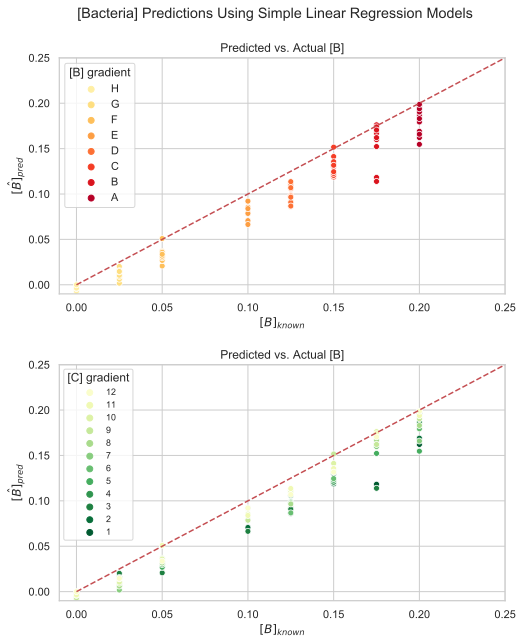

In [32]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))


sns.scatterplot(x='bact_cnt', y='B_p', data=mdf, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [B]')
axes[0].set_ylabel('$\hat{[B]}$$_{pred}$')
axes[0].set_xlabel('$[B]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.25)
axes[0].set_ylim(bottom=-0.01, top=.25)



sns.scatterplot(x='bact_cnt', y='B_p', data=mdf, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
               loc=2, prop={'size':9})
axes[1].set_title('Predicted vs. Actual [B]')
axes[1].set_ylabel('$\hat{[B]}$$_{pred}$')
axes[1].set_xlabel('$[B]_{known}$')

axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.25)
axes[1].set_ylim(bottom=-0.01, top=.25)


fig.suptitle("[Bacteria] Predictions Using Simple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)

#fig.savefig("Predicted [B] with SLR Models")

plt.show()
plt.close()

## We can clearly see that the model underpredicts the concentration of bacteria in 
        our system, and as evidenced by the bottom graph, the increasing [chlamy] is
        mainly responsible for this effect. However, we also can note that the predicted
        values themselves have a low variability between themselves. It may be possible
        to derive some correction factor for this.
        

# $\hat{[C]}$

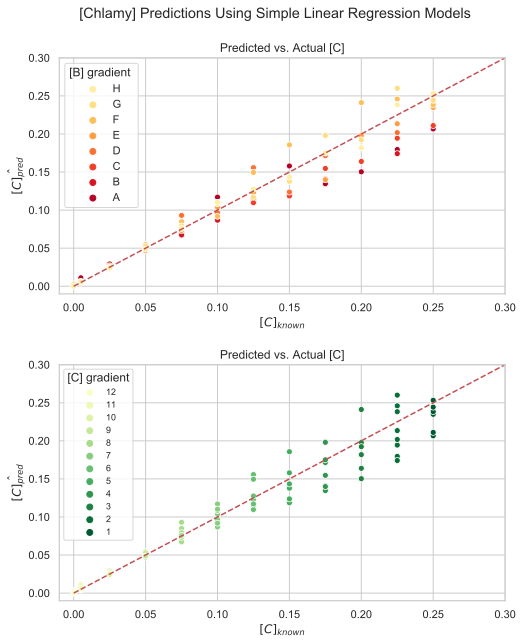

In [33]:
fig=plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))


sns.scatterplot(x='chlamy_cnt', y='C_p', data=mdf, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient ')
axes[0].set_title('Predicted vs. Actual [C]')
axes[0].set_ylabel('$\hat{[C]_{pred}}$')
axes[0].set_xlabel('$[C]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.30)
axes[0].set_ylim(bottom=-0.01, top=.30)


sns.scatterplot(x='chlamy_cnt', y='C_p', data=mdf, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
              prop={'size':9}, loc=2)
axes[1].set_title('Predicted vs. Actual [C]')
axes[1].set_ylabel('$\hat{[C]_{pred}}$')
axes[1].set_xlabel('$[C]_{known}$')

axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.30)
axes[1].set_ylim(bottom=-0.01, top=.30)

fig.suptitle("[Chlamy] Predictions Using Simple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)
fig.savefig("Predicted [C] with SLR Models")

plt.show()
plt.close()

        
        Here as well we can see the effect the increasing bacteria concentration has on
        predicting the concentration of chlamydomonas. The more bacteria there is in
        the system the lower the predicted value will be. 

# $\widehat{A_{750}}$

In [ ]:
fig=plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))

        
        
sns.scatterplot(x='corr_abs_750', y='abs_750_prd', data=df_main, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual $A_{750}$')
axes[0].set_ylabel('$\hat{A_{750}}$')
axes[0].set_xlabel('$A_{750}$')

axes[0].plot((0,1), 'r--')
axes[0].set_xlim(left=-0.01, right=.55)
axes[0].set_ylim(bottom=-0.01, top=.55)


sns.scatterplot(x='corr_abs_750', y='abs_750_prd', data=df_main,hue='col', 
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
              prop={'size':9}, loc=2)
axes[1].set_title('Predicted vs. Actual $A_{750}$')
axes[1].set_ylabel('$\hat{A_{750}}$')
axes[1].set_xlabel('$A_{750}$')

axes[1].plot((0,1), 'r--')
axes[1].set_xlim(left=-0.01, right=.55)
axes[1].set_ylim(bottom=-0.01, top=.55)

fig.suptitle("$A_{750}$ Predictions Using Simple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)
fig.savefig("Predicted A750 with SLR Models")

plt.show()
plt.close()

        
        We can see that the models are better at predicting the Absorbance values than the
        concentrations as evidenced by the lines tracing the 1:1 line better.  We can note,
        however, that as both analytes increase the model overestimates the signal.in the top graph that as the concentration of 
        bacteria increases it pushes the predicted value lower.
        
        

# $\widehat{A_{680}}$

ValueError: Could not interpret input 'abs_680_prd'

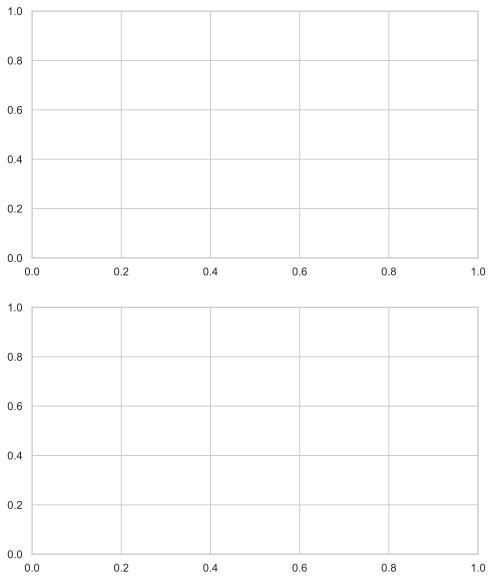

In [4]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))

        
        
sns.scatterplot(x='corr_abs_680', y='abs_680_prd', data=df_main, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual $A_{680}$')
axes[0].set_ylabel('$\hat{A_{680}}$')
axes[0].set_xlabel('$A_{680}$')

axes[0].plot((0,1), 'r--')
axes[0].set_xlim(left=-0.01, right=1)
axes[0].set_ylim(bottom=-0.01, top=1)


sns.scatterplot(x='corr_abs_680', y='abs_680_prd', data=df_main,hue='col', 
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
              prop={'size':9}, loc=2)
axes[1].set_title('Predicted vs. Actual $A_{680}$')
axes[1].set_ylabel('$\hat{A_{680}}$')
axes[1].set_xlabel('$A_{680}$')

axes[1].plot((0,1), 'r--')
axes[1].set_xlim(left=-0.01, right=1)
axes[1].set_ylim(bottom=-0.01, top=1)

fig.suptitle("$A_{680}$ Predictions Using Simple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)
fig.savefig("Predicted A680 with SLR Models")

plt.tight_layout()
plt.show()
plt.close()

# EXTRA
## Modeling $A_{680}$ & $A_{750}$ Ratios and Differences v. Fluorescence

In [ ]:
# preprocess

bact_cnt_list = df_main['bact_cnt'].unique()
chlamy_cnt_list = df_main['chlamy_cnt'].unique()

df_main['ratio_abs'] = df_main['corr_abs_680'] / df_main['corr_abs_750']
df_main['diffs_abs'] = df_main['corr_abs_680'] - df_main['corr_abs_750']
df_main['log(ratio_abs)'] = np.log(df_main['ratio_abs'].values)
df_main['ratio_con'] = df_main['chlamy_cnt'] / df_main['bact_cnt']



df_main.head()
df_main.describe()

### Ratio v. Fluo
        Note: We cannot compare A6/A7 (R*) against individual concentrations (e.g. R* v. [B]) because 
        the ratio itself is already coupled to both concentrations
        
        However, there might be a relationship betwen R* and Fluo 
        
        
        # it doesn't lookg like this path will be very fruitful.... mostly because different combination
        # of absorbances produce the same ratio which means that we cannot create a function from these
        

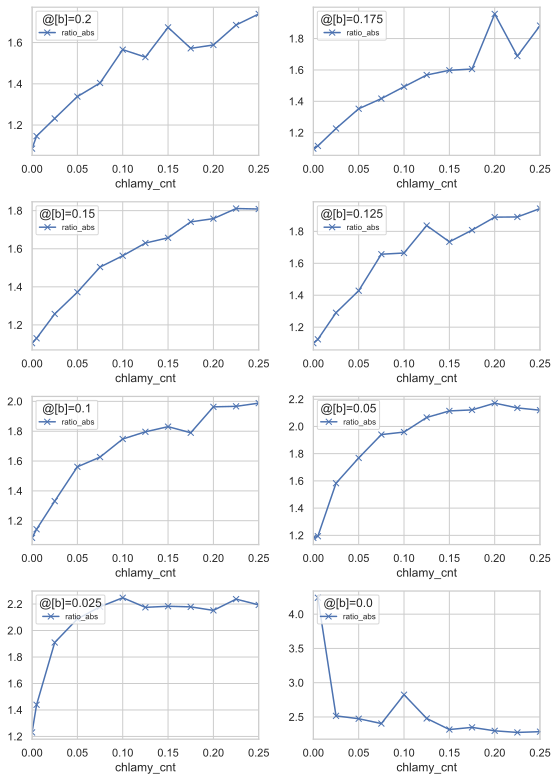

In [25]:
# Note: row=='H' has only Chlamy in the well and no bacteria
plt.figure(figsize=(8,11))
gs = gridspec.GridSpec(4,2)
axes = []
for r in [0,1,2,3]:
    for c in [0,1]:
        axes.append(plt.subplot(gs[r,c]))
        
# concentrations as standard python lists

# axes acces through generator
axes = (ax for ax in axes)
rows=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

i = 0
for row in rows:
    
    
    ax=next(axes)
    
    df_main.loc[df_main['row']==row].plot(x='chlamy_cnt', y='ratio_abs', style='-x', ax=ax)          
    
    #df_main.loc[df_main['row']==row].plot(x='ratio_abs', y='corr_fluo', style='-x', ax=ax)          
    #df_main.loc[df_main['row']==row].plot(x='log(ratio_abs)', y='corr_fluo', style='-x', ax=ax)          
    #df_main.loc[df_main['row']==row].plot(x='ratio_abs', y='log(corr_fluo)', style='-x', ax=ax)    
    #df_main.loc[df_main['row']==row].plot(x='log(ratio_abs)', y='log(corr_fluo)', style='-x', ax=ax)          
    ax.legend(loc=2, title='@'+'[b]='+str(bact_cnt_list[i]), prop={'size': 8})
    
    i+=1
plt.tight_layout()

### Differences vs. Fluo

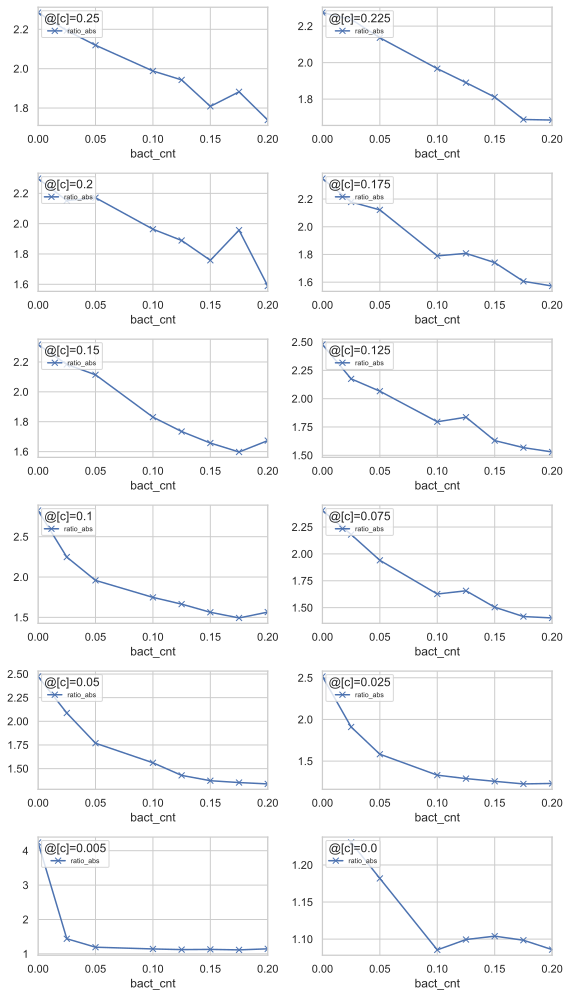

In [27]:
plt.figure(figsize=(8,14))
gs = gridspec.GridSpec(6,2)
axes = []
for r in [0,1,2,3,4,5]:
    for c in [0,1]:
        axes.append(plt.subplot(gs[r,c]))        

# as a generator
axes = (ax for ax in axes)

cols=[n for n in range(1,13)]
i=0
for col in cols:
    col
    ax=next(axes)
    df_main.loc[df_main['col']==col].plot(x='bact_cnt', y='ratio_abs', style='-x', ax=ax)          
    
    #df_main[df_main['col']==col].plot(x='diffs_abs', y='corr_fluo', style='-*', ax=ax)
    #df_main[df_main['col']==col].plot(x='diffs_abs', y='log(corr_fluo)', style='-*', ax=ax)
    ax.legend(loc=2, title='@'+'[c]='+str(chlamy_cnt_list[i]), prop={'size': 7})
    i+=1
    
plt.tight_layout()

### Ratio v. Differences

In [ ]:
plt.figure(figsize=(8,14))
gs = gridspec.GridSpec(6,2)
axes = []
for r in [0,1,2,3,4,5]:
    for c in [0,1]:
        axes.append(plt.subplot(gs[r,c]))        

# as a generator
axes = (ax for ax in axes)

cols=[n for n in range(1,13)]
i=0
for col in cols:
    
    ax=next(axes)
    fig = df_main.loc[df_main['col']==col].plot(x='ratio_abs', y='diffs_abs', style='-*', ax=ax)
    ax.legend(loc=2, title='@'+'[c]='+str(chlamy_cnt_list[i]), prop={'size': 7})
    i+=1
    
plt.tight_layout()


